# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Mukhlis Sirajuddin
- Email: Mukhlizt07@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- pertanyaan 1 : Musim apa yang jumlah penyewa paling banyak dan paling sedikit?
- pertanyaan 2 : Apa 5 hari dengan yang paling banyak penyewa?

## Menyaipkan semua library yang dibuthkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [5]:
days = pd.read_csv('day.csv')
days.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [6]:
days.info()
days.isna().sum()
print("jumlah duplikat: ", days.duplicated().sum())
#cari Missing value
days.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
jumlah duplikat:  0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Setelah ditelusuri ternyata tidak ada data duplikat dan missing value

### Cleaning Data

In [ ]:
# karen tidak ada kendala pada data set seperti data duplikat atau missing value maka tidak perlu dilakukan cleaning data

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
#Mencari Data dengan Penyewa paling Banyak
cari = (days['cnt'] > 4548)
cari_data = days[cari]
musim = cari_data['season'].unique()
total1 = days[cari].shape[0]
print("jumlah data diatas 4548 penyewa: ", total1)
print("musim dengan penyewa diatas 4548 ada di musim: ", musim)
musim_1 = (days['season'] == 1)
total_musim_1 = cari & musim_1
season1 = days[total_musim_1].shape[0]
musim_2 = (days['season'] == 2)
total_musim_2 = cari & musim_2
season2 = days[total_musim_2].shape[0]
musim_3 = (days['season'] == 3)
total_musim_3 = cari & musim_3
season3 = days[total_musim_3].shape[0]
musim_4 = (days['season'] == 4)
total_musim_4 = cari & musim_4
season4 = days[total_musim_4].shape[0]
print(" ")
#mencari data penyewa paling sedikit
cari1 = (days['cnt'] < 4548)
cari_data1 = days[cari1]
musim1 = cari_data1['season'].unique()
total11 = days[cari1].shape[0]
print("jumlah data dibawah 4548 penyewa: ", total11)
print("musim dengan penyewa dibawah 4548 ada di musim: ", musim1)
musim_11 = (days['season'] == 1)
total_musim_11 = cari1 & musim_11
season11 = days[total_musim_11].shape[0]
musim_22 = (days['season'] == 2)
total_musim_22 = cari1 & musim_22
season22 = days[total_musim_22].shape[0]
musim_33 = (days['season'] == 3)
total_musim_33 = cari1 & musim_33
season33 = days[total_musim_33].shape[0]
musim_44 = (days['season'] == 4)
total_musim_44 = cari1 & musim_44
season44 = days[total_musim_44].shape[0]
print(" ")
#5 hari teratas dengan penyewa paling banyak
data_terbanyak = days.nlargest(5, 'cnt')

jumlah data diatas 4548 penyewa:  365
musim dengan penyewa diatas 4548 ada di musim:  [2 3 4 1]
 
jumlah data dibawah 4548 penyewa:  365
musim dengan penyewa dibawah 4548 ada di musim:  [1 2 3 4]
 


## Visualization & Explanatory Analysis

### Pertanyaan 1: Musim apa yang jumlah penyewa paling banyak dan paling sedikit?

jumlah data musim 1 dengan jumlah penyewa diatas 4548:  16
jumlah data musim 2 dengan jumlah penyewa diatas 4548:  113
jumlah data musim 3 dengan jumlah penyewa diatas 4548:  143
jumlah data musim 4 dengan jumlah penyewa diatas 4548:  93


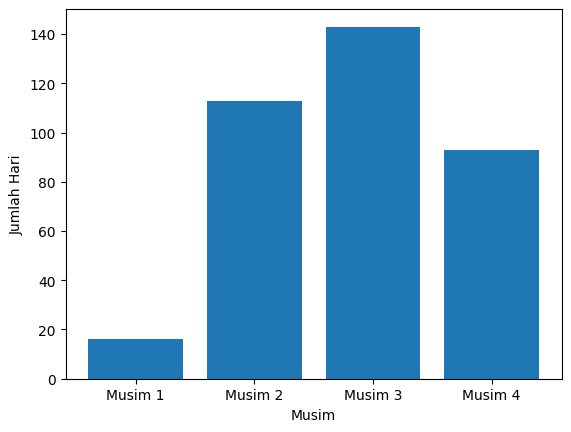



jumlah data musim 1 dengan jumlah penyewa dibawah 4548:  165
jumlah data musim 2 dengan jumlah penyewa dibawah 4548:  70
jumlah data musim 3 dengan jumlah penyewa dibawah 4548:  45
jumlah data musim 4 dengan jumlah penyewa dibawah 4548:  85


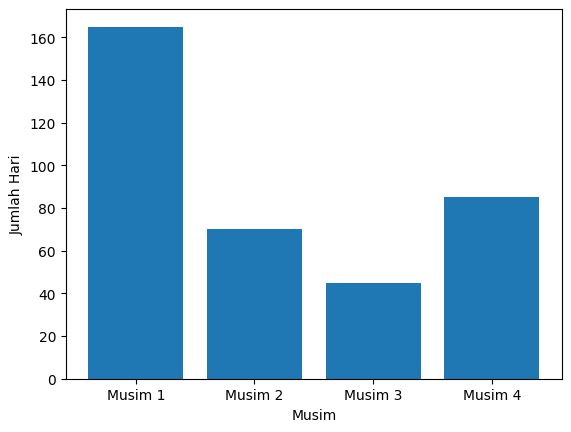

In [27]:
print("jumlah data musim 1 dengan jumlah penyewa diatas 4548: ", season1)
print("jumlah data musim 2 dengan jumlah penyewa diatas 4548: ", season2)
print("jumlah data musim 3 dengan jumlah penyewa diatas 4548: ", season3)
print("jumlah data musim 4 dengan jumlah penyewa diatas 4548: ", season4)
musim_banyak = ('Musim 1', 'Musim 2', 'Musim 3', 'Musim 4')
jumlah =(season1, season2, season3, season4)
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
plt.bar(x=musim_banyak, height=jumlah)
plt.show()
print("\n")
print("jumlah data musim 1 dengan jumlah penyewa dibawah 4548: ", season11)
print("jumlah data musim 2 dengan jumlah penyewa dibawah 4548: ", season22)
print("jumlah data musim 3 dengan jumlah penyewa dibawah 4548: ", season33)
print("jumlah data musim 4 dengan jumlah penyewa dibawah 4548: ", season44)
musim_sedikit = ('Musim 1', 'Musim 2', 'Musim 3', 'Musim 4')
jumlah1 =(season11, season22, season33, season44)
plt.bar(x=musim_sedikit, height=jumlah1)
plt.xlabel('Musim')
plt.ylabel('Jumlah Hari')
plt.show()

####1. Pada grafik pertama terlihat bahwa musim ke-tiga merupakan musim dengan jumlah penyewaan sepeda terbanyak dalam kurun waktu 2 tahun, dengan total hari sebanyak 143
####2. Pada grafik kedua terlihat bahwa musim pertama tercatat sebagai musim dengan jumlah penyewaan paling sedikit dengan total hari sebanyak 165. Selama periode hari ini jumlah penyewaan sepeda dibawah 50 % dari jumlah penyewaan terbanyak yang pernah tercatat dalam periode 2011-2012.

### Pertanyaan 2: Apa 5 hari dengan yang paling banyak penyewa?

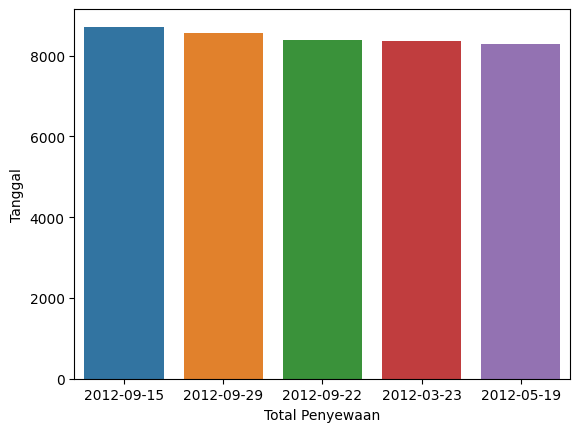

In [36]:
data_terbanyak = days.nlargest(5, 'cnt')
tanggal = data_terbanyak[["dteday", "casual", "registered","cnt"]]
tanggal.head()
fig, ax = plt.subplots(nrows=1, ncols=1)
sns.barplot(x="dteday", y="cnt", data=tanggal.head(), ax=ax)
ax.set_ylabel("Tanggal")
ax.set_xlabel("Total Penyewaan")
plt.show()

###Grafik diatas menunjukkan 5 hari dengan penyewaan terbanyak

## Conclusion

- Conclution pertanyaan 1
- conclution pertanyaan 2

In [37]:
print("Kesimpulan\n")
print("1. Musim ke-tiga merupakan musim dimana jumlah penyewaan terbanyak dengan total hari dimana penyewaan diatas 50% dari total penyewaan terbanyak adalah 143 hari. Dan musim pertama merupakan musim dimana jumlah penyewaan paling sedikit dengan total hari dimana penyewaan dibawah 50% dari total penyewaan terbanyak adalah 165 hari.\n")
print("Berdasarkan data tersebut peningkat kualitas atau kuantitas penyewaan pada musim ke tiga sangat di anjurkan\n")
print("2. Tanggal 15-09-2012 merupakan hari dimana jumlah penyewaan terbanyak selama periode 2011-2012.\n")

Kesimpulan

1. Musim ke-tiga merupakan musim dimana jumlah penyewaan terbanyak dengan total hari dimana penyewaan diatas 50% dari total penyewaan terbanyak adalah 143 hari. Dan musim pertama merupakan musim dimana jumlah penyewaan paling sedikit dengan total hari dimana penyewaan dibawah 50% dari total penyewaan terbanyak adalah 165 hari.

Berdasarkan data tersebut peningkat kualitas atau kuantitas penyewaan pada musim ke tiga sangat di anjurkan

2. Tanggal 15-09-2012 merupakan hari dimana jumlah penyewaan terbanyak selama periode 2011-2012.

